# Trump Tweets Project

## Introduction
blablabla la di da

## list of imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys
if "nltk" not in sys.modules:
    !pip install nltk
if "selenium" not in sys.modules:
    !pip install selenium

import selenium  # not sure this is needed but I keep it here for now
import nltk  # natural language toolkit
from random import choices

C:\Users\mustakarhu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CSV files

In [2]:
# read dataframes
df = pd.read_csv('tweets.csv')

In [3]:
# TWEETS TEXT ANALYSIS 
tweets = df.copy()

# CLEAN UP DATA
# only consider tweets sent by Trump
tweets = tweets[tweets.is_retweet==False] 
# to remove links
def remove_links(text):
    words = text.split()
    words = [word for word in words if not (word.startswith('http:') or word.startswith('https:'))]
    return ' '.join(words)

# to remove numbers and punctuation
def filter_alpha(text):
    words = text.split()
    words = [word for word in words if word.isalpha()]
    return ' '.join(words)

# tidy up: apply functions defined above, normalize everything to lower case, remove rows that are empty, tokenize.
tweets.text = tweets.text.apply(remove_links)
tweets.text = tweets.text.apply(filter_alpha)
tweets.text = tweets.text.str.lower()
tweets = tweets[tweets.text != ""]
tweets.text = tweets.text.str.split()

# flatten out all the text
list_of_texts = tweets.text.tolist()
all_text = [word for text in list_of_texts for word in text]

# distribution of words
nltk.FreqDist(all_text)

FreqDist({'the': 19828, 'to': 10683, 'and': 9554, 'of': 8011, 'a': 7082, 'in': 6179, 'is': 6019, 'for': 4964, 'i': 3845, 'on': 3754, ...})

In [4]:
# remove stopwords and irrelevant terms

# list of irrelevant words and stop words (from the english language)
remove_list = ['rt']
stop_words = nltk.corpus.stopwords.words('english')

all_text = [word for word in all_text if word not in remove_list]
all_text = [word for word in all_text if word not in stop_words]

# get the distrubution again and fetch the N most common words
N = 1500
occurrences = nltk.FreqDist(all_text)
dict_occurrences = occurrences.most_common(N)

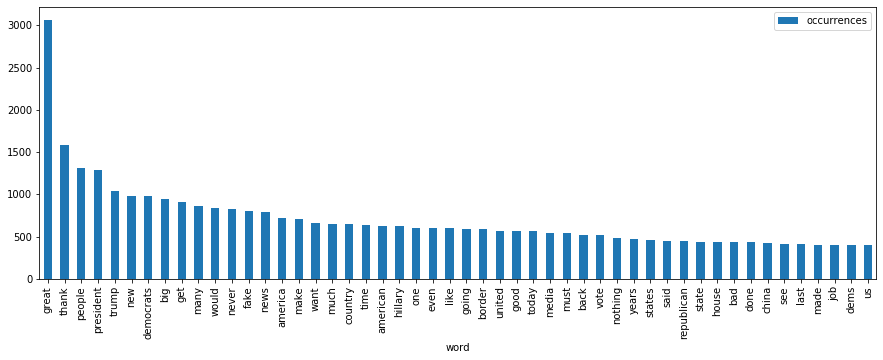

In [5]:
d = {'word':[x[0] for x in dict_occurrences], 'occurrences':[x[1] for x in dict_occurrences]}
df_trump_bow = pd.DataFrame(data=d)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
df_trump_bow.head(50).plot(kind='bar', x='word', y='occurrences', ax=ax)
plt.show()

In [6]:
df_trump_bow[df_trump_bow.word == 'tremendous']

,word,occurrences
201,tremendous,156
